# **Handwritten Digit Recognition using MNIST Dataset**

### **CONVOLUTIONAL NEURAL NETWORK (CNN)**

**1.INSTALLING THE PACKAGES**

In [1]:
pip install tensorflow

**2.IMPORTING NECESSARY LIBRARIES**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report


**3.LOAD AND PREPROCESS THE DATA**

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


**4.VISUALIZING SAMPLES**  

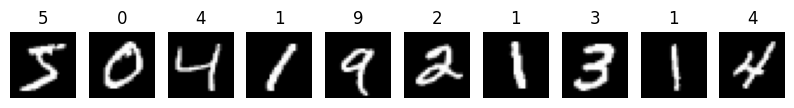

In [4]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

**5.BUILDING COVOLUTIONAL NEURAL NETWORK (CNN)**

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

**6.TRAIN THE MODEL**

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.8466 - loss: 0.4986 - val_accuracy: 0.9834 - val_loss: 0.0596
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9812 - loss: 0.0598 - val_accuracy: 0.9855 - val_loss: 0.0497
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accuracy: 0.9867 - val_loss: 0.0439
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9891 - val_loss: 0.0375
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9889 - val_loss: 0.0427
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9886 - val_loss: 0.0411
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 74ms/step - accuracy: 0.9953 - loss: 0.0139 - 

**7.VISUALIZING TRAINING RESULTS**

In [18]:
# Plot accuracy and loss during training
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

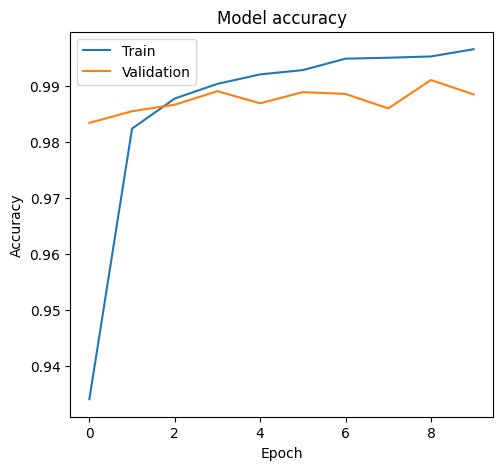

In [28]:
# Plot accuracy and loss during training
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

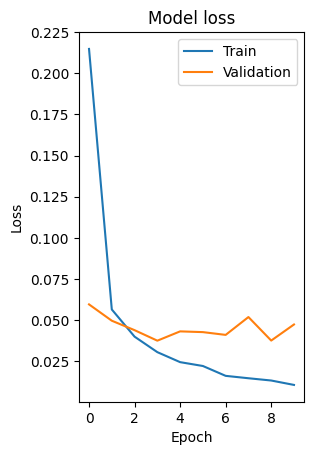

In [29]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**8.MODEL ON TEST DATA**  

In [22]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9883 - loss: 0.0432

Test accuracy: 99.10%


**9.CONFUSION MATRIX AND CLASSIFICATION REPORT**  

In [23]:
# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


***CONFUSION MATRIX***

In [24]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

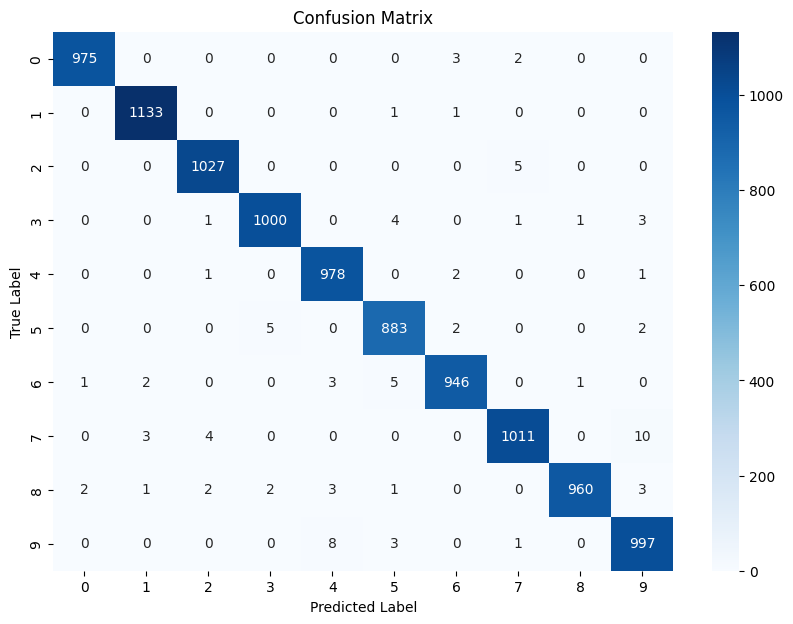

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***CLASSIFICATION REPORT***

In [26]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



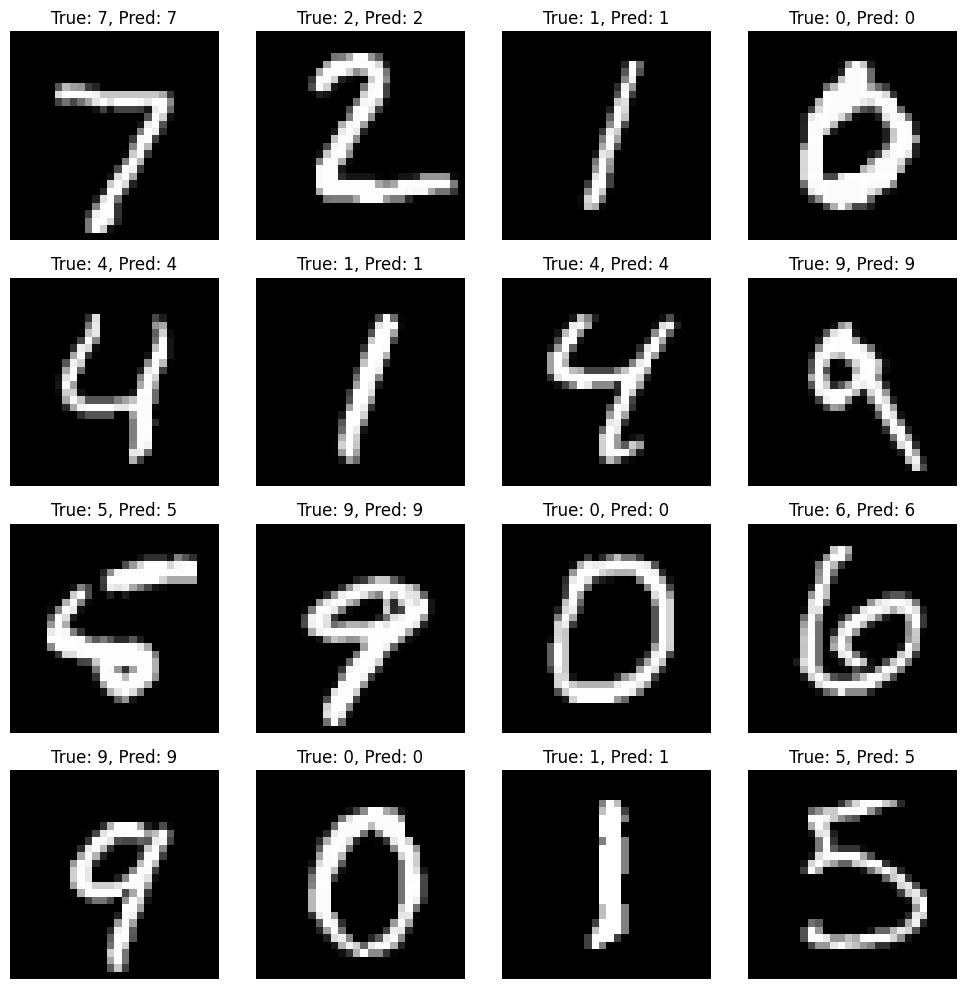

In [27]:
# Visualize some test set predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **K-NEAREST NEIGHBOUR (KNN)**


**1.IMPORTING LIBRARIES**  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**2.RESHAPE DATA FOR KNN**  

In [32]:
# Flatten the image data (28x28 -> 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [33]:
print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


**3.TRAIN THE KNN MODEL**

In [34]:
# Instantiate the KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the flattened training data
knn_model.fit(X_train_flat, y_train)


KNeighborsClassifier(n_neighbors=3)

**4.EVALUATE KNN MODEL**  

In [36]:
# Predict using KNN
y_pred_knn = knn_model.predict(X_test_flat)

In [37]:
# Calculate KNN accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f'\nKNN Test accuracy: {knn_acc * 100:.2f}%')


KNN Test accuracy: 97.05%


**5.COMPARE CNN AND KNN PERFORMANCE**  

In [38]:
# Output both accuracies for comparison
print(f'\nCNN Test accuracy: {test_acc * 100:.2f}%')
print(f'KNN Test accuracy: {knn_acc * 100:.2f}%')



CNN Test accuracy: 99.10%
KNN Test accuracy: 97.05%


*CONFUSION MATRIX*

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [42]:
# Generate the confusion matrix for KNN
knn_cm = confusion_matrix(y_test, y_pred_knn)

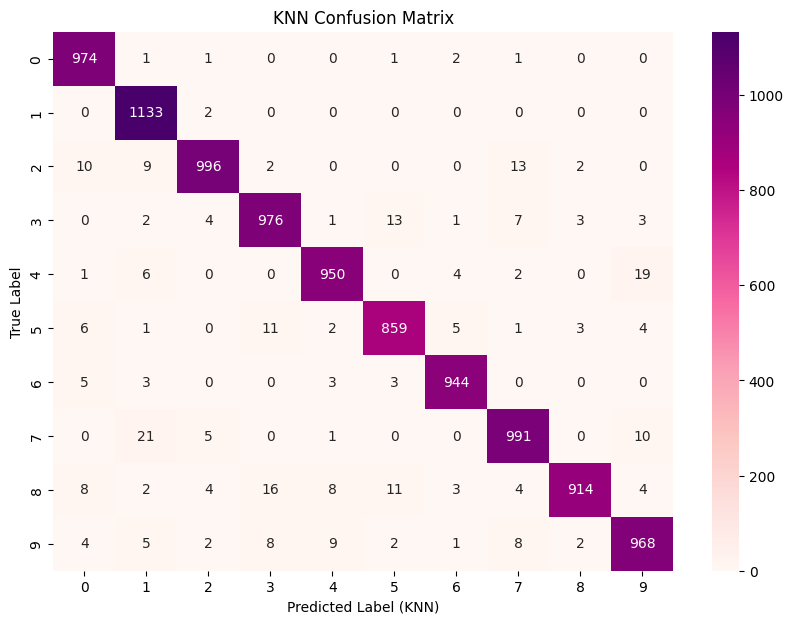

In [46]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='RdPu', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label (KNN)')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

**6.VISUALIZATION FOR KNN**  

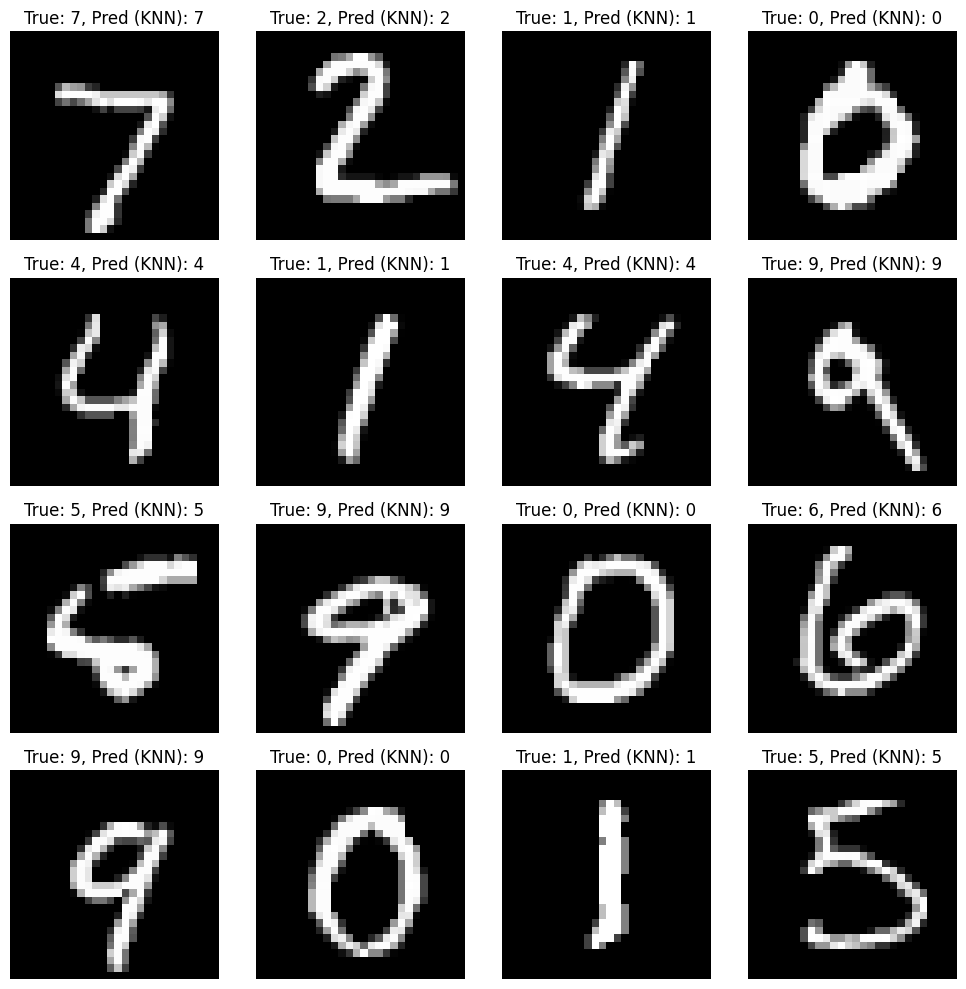

In [48]:
# Visualize some KNN predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred (KNN): {y_pred_knn[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


*Visualizing Some Misclassified Digits by KNN*

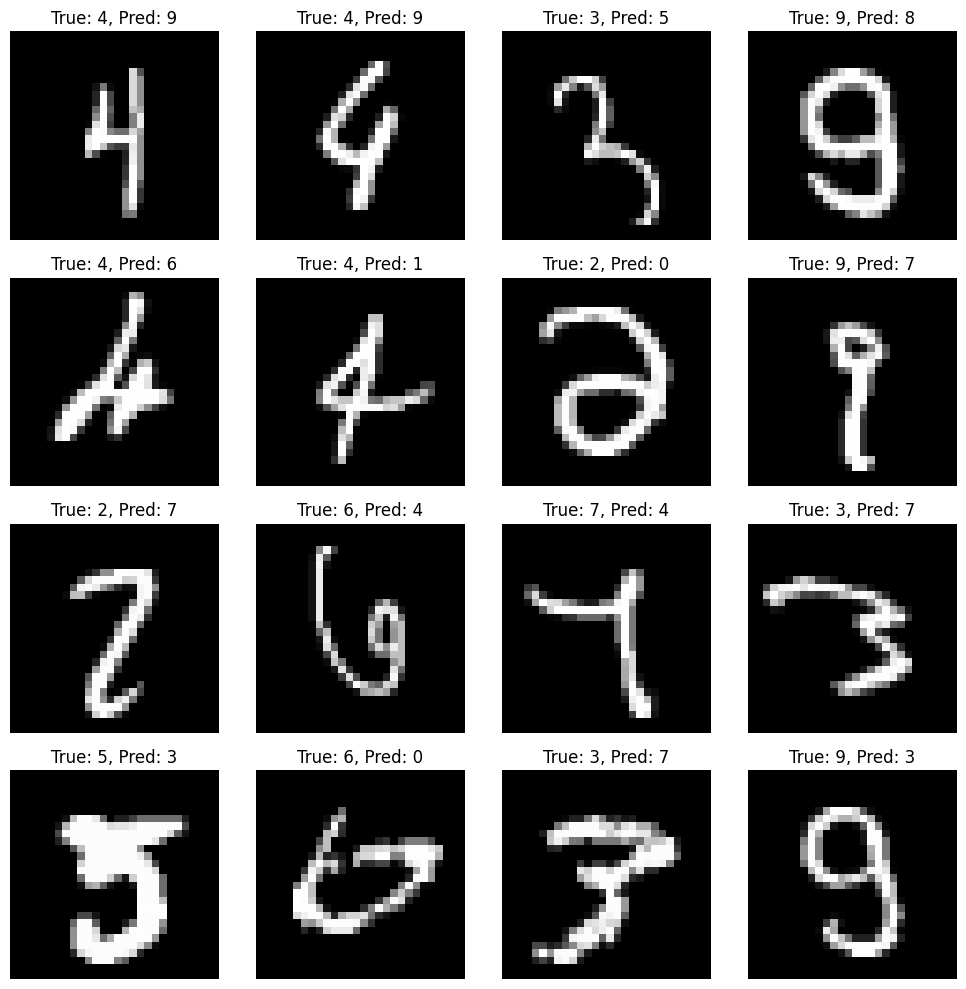

In [49]:
# Find indices of misclassified examples
misclassified_indices = np.where(y_test != y_pred_knn)[0]

# Visualize some of the misclassified digits
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:16]):  # Show 16 examples
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_knn[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## **VISUALIZATION: COMPARING KNN AND CNN ACCURACY**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [53]:
# Test accuracies of both models
cnn_accuracy = test_acc * 100  # CNN accuracy in percentage
knn_accuracy = knn_acc * 100  # KNN accuracy in percentage

In [54]:
# Calculate loss for KNN using mean squared error
knn_loss = mean_squared_error(y_test, y_pred_knn)  # KNN doesn't have a standard loss function
cnn_loss = test_loss  # From the CNN evaluation

In [55]:
# Prepare data for visualization
models = ['CNN', 'KNN']
accuracies = [cnn_accuracy, knn_accuracy]
losses = [cnn_loss, knn_loss]

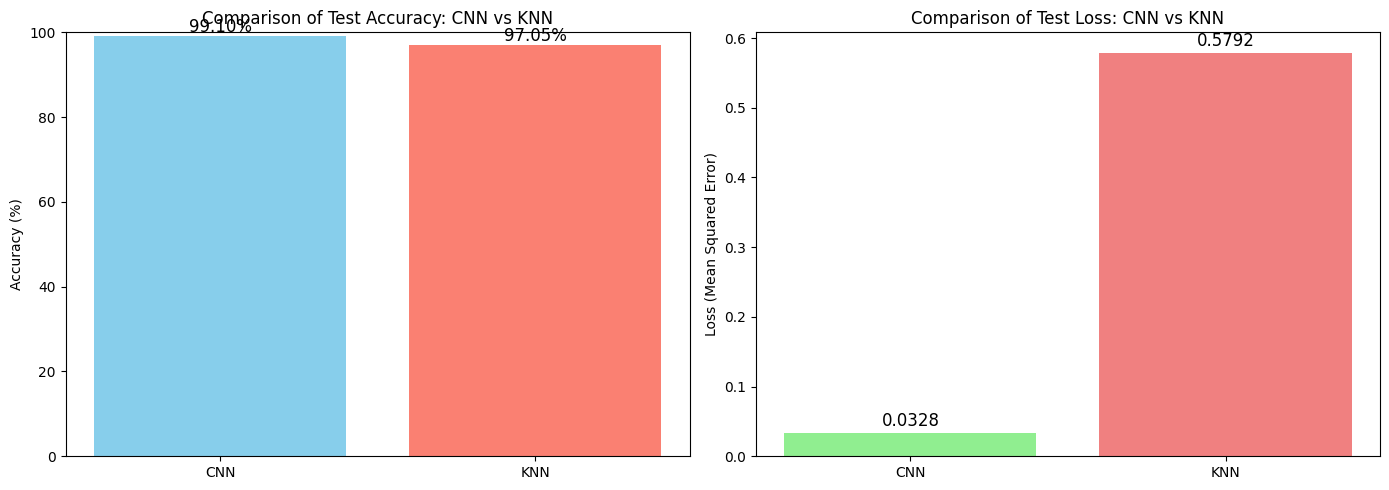

In [62]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for accuracy
axs[0].bar(models, accuracies, color=['skyblue', 'salmon'])
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Comparison of Test Accuracy: CNN vs KNN')
axs[0].set_ylim([0, 100])  # Set y-axis limit to 100 for percentage
for i, acc in enumerate(accuracies):
    axs[0].text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=12)

# Bar chart for loss
axs[1].bar(models, losses, color=['lightgreen', 'lightcoral'])
axs[1].set_ylabel('Loss (Mean Squared Error)')
axs[1].set_title('Comparison of Test Loss: CNN vs KNN')
for i, loss in enumerate(losses):
    axs[1].text(i, loss + 0.01, f'{loss:.4f}', ha='center', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()